In [240]:
from mftool import Mftool
mf = Mftool()
import pandas as pd
import matplotlib.pyplot as plt


equity = {
    "0P00012ALS": "Motilal Oswal Midcap 30 Direct Growth",
    "0P0000XW4J": "Quant Small Cap Fund Growth Option Direct Plan",
    "0P0000XW51": "Quant Tax Plan Growth Option Direct Plan",
}
debt = {
    "0P0000XUXV": "ICICI Prudential Gilt Fund Direct Plan Growth",
    "0P0000K1C8": "PGIM India Gilt Fund Growth",
    "0P0000XVBF": "PGIM India Dynamic Bond Fund Direct Plan Growth Option",
}
hybrid = {
    "0P00014MH9": "Kotak Equity Hybrid Fund - Direct Plan - Growth",
    "0P0000XW46": "Edelweiss Aggressive Hybrid -Direct Plan-Growth Option",
    "0P0000XZRU": "Kotak Debt Hybrid Direct Growth",
}
temp_list1 = []
temp_list2 = []
temp_list3 = []
for scheme_code in equity:
    temp_list1.append(
        mf.history(scheme_code, start="2018-08-29", end="2023-08-29", as_dataframe=True)
    )

for scheme_code in debt:
    temp_list2.append(
        mf.history(scheme_code, start="2018-08-29", end="2023-08-29", as_dataframe=True)
    )

for scheme_code in hybrid:
    temp_list3.append(
        mf.history(scheme_code, start="2018-08-29", end="2023-08-29", as_dataframe=True)
    )
equity_dfs = dict(zip(equity, temp_list1))
debt_dfs = dict(zip(debt, temp_list2))
hybrid_dfs = dict(zip(hybrid, temp_list3))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [241]:
equity_dfs

{'0P00012ALS':                   nav  dayChange
 date                            
 29-08-2018  29.691700        NaN
 30-08-2018  29.525900  -0.165800
 31-08-2018  29.381001  -0.144899
 03-09-2018  29.109699  -0.271301
 04-09-2018  28.579201  -0.530499
 ...               ...        ...
 22-08-2023  66.828499   0.524200
 23-08-2023  67.223602   0.395103
 24-08-2023  67.724403   0.500801
 25-08-2023  67.555901  -0.168503
 28-08-2023  67.385498  -0.170403
 
 [1229 rows x 2 columns],
 '0P0000XW4J':                    nav  dayChange
 date                             
 29-08-2018   52.583500        NaN
 30-08-2018   52.462700  -0.120800
 31-08-2018   52.477299   0.014599
 03-09-2018   52.271099  -0.206200
 04-09-2018   51.953800  -0.317299
 ...                ...        ...
 22-08-2023  189.257706   1.286011
 23-08-2023  190.408997   1.151291
 24-08-2023  189.705002  -0.703995
 25-08-2023  188.326996  -1.378006
 28-08-2023  190.143707   1.816711
 
 [1229 rows x 2 columns],
 '0P0000XW51':     

In [242]:
equity_dfs["0P00012ALS"]

,nav,dayChange
date,,
29-08-2018,29.691700,NaN
30-08-2018,29.525900,-0.165800
31-08-2018,29.381001,-0.144899
03-09-2018,29.109699,-0.271301
04-09-2018,28.579201,-0.530499
...,...,...
22-08-2023,66.828499,0.524200
23-08-2023,67.223602,0.395103
24-08-2023,67.724403,0.500801


In [243]:
for scheme_code in equity:
    equity_dfs[scheme_code].reset_index(inplace=True)
    equity_dfs[scheme_code].drop(columns="dayChange", inplace=True)


for scheme_code in debt:
    debt_dfs[scheme_code].reset_index(inplace=True)
    debt_dfs[scheme_code].drop(columns="dayChange", inplace=True)


for scheme_code in hybrid:
    hybrid_dfs[scheme_code].reset_index(inplace=True)
    hybrid_dfs[scheme_code].drop(columns="dayChange", inplace=True)

In [244]:
for scheme_code in equity:
    print(equity_dfs[scheme_code][equity_dfs[scheme_code].isnull().any(axis=1)])

Empty DataFrame
Columns: [date, nav]
Index: []
Empty DataFrame
Columns: [date, nav]
Index: []
Empty DataFrame
Columns: [date, nav]
Index: []


In [245]:
for scheme_code in equity:
    print(equity_dfs[scheme_code].shape)
for scheme_code in debt:
    print(debt_dfs[scheme_code].shape)
for scheme_code in hybrid:
    print(hybrid_dfs[scheme_code].shape)

(1229, 2)
(1229, 2)
(1228, 2)
(1208, 2)
(1208, 2)
(1208, 2)
(1229, 2)
(1229, 2)
(1209, 2)


In [246]:
for scheme_code in equity:
    print(equity_dfs[scheme_code].dtypes)
for scheme_code in debt:
    print(debt_dfs[scheme_code].dtypes)
for scheme_code in hybrid:
    print(hybrid_dfs[scheme_code].dtypes)

date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object
date     object
nav     float64
dtype: object


In [247]:
for scheme_code in equity:
    equity_dfs[scheme_code]["date"] = pd.to_datetime(
        equity_dfs[scheme_code]["date"], dayfirst=True
    )
for scheme_code in debt:
    debt_dfs[scheme_code]["date"] = pd.to_datetime(
        debt_dfs[scheme_code]["date"], dayfirst=True
    )
for scheme_code in hybrid:
    hybrid_dfs[scheme_code]["date"] = pd.to_datetime(
        hybrid_dfs[scheme_code]["date"], dayfirst=True
    )

In [248]:
for scheme_code in equity:
    equity_dfs[scheme_code].rename(columns={"nav": equity[scheme_code]}, inplace=True)

for scheme_code in debt:
    debt_dfs[scheme_code].rename(columns={"nav": debt[scheme_code]}, inplace=True)

for scheme_code in hybrid:
    hybrid_dfs[scheme_code].rename(columns={"nav": hybrid[scheme_code]}, inplace=True)

In [249]:
equity_dfs

{'0P00012ALS':            date  Motilal Oswal Midcap 30 Direct Growth
 0    2018-08-29                              29.691700
 1    2018-08-30                              29.525900
 2    2018-08-31                              29.381001
 3    2018-09-03                              29.109699
 4    2018-09-04                              28.579201
 ...         ...                                    ...
 1224 2023-08-22                              66.828499
 1225 2023-08-23                              67.223602
 1226 2023-08-24                              67.724403
 1227 2023-08-25                              67.555901
 1228 2023-08-28                              67.385498
 
 [1229 rows x 2 columns],
 '0P0000XW4J':            date  Quant Small Cap Fund Growth Option Direct Plan
 0    2018-08-29                                       52.583500
 1    2018-08-30                                       52.462700
 2    2018-08-31                                       52.477299
 3    2018-0

In [250]:
merge_equity = pd.DataFrame()
merge_debt = pd.DataFrame()
merge_hybrid = pd.DataFrame()

for df in equity_dfs.values():
    if merge_equity.empty:
        merge_equity = df
    else:
        merge_equity = pd.merge(merge_equity, df, on="date", how="outer")

for df in debt_dfs.values():
    if merge_debt.empty:
        merge_debt = df
    else:
        merge_debt = pd.merge(merge_debt, df, on="date", how="outer")

for df in hybrid_dfs.values():
    if merge_hybrid.empty:
        merge_hybrid = df
    else:
        merge_hybrid = pd.merge(merge_hybrid, df, on="date", how="outer")

In [251]:
merge_equity

,date,Motilal Oswal Midcap 30 Direct Growth,Quant Small Cap Fund Growth Option Direct Plan,Quant Tax Plan Growth Option Direct Plan
0,2018-08-29,29.691700,52.583500,98.234497
1,2018-08-30,29.525900,52.462700,98.169800
2,2018-08-31,29.381001,52.477299,98.613503
3,2018-09-03,29.109699,52.271099,97.612396
4,2018-09-04,28.579201,51.953800,96.152702
...,...,...,...,...
1224,2023-08-22,66.828499,189.257706,292.064392
1225,2023-08-23,67.223602,190.408997,292.571686
1226,2023-08-24,67.724403,189.705002,291.222107
1227,2023-08-25,67.555901,188.326996,288.174591


In [252]:
for scheme_name in equity.values():
    merge_equity[scheme_name] = (
        merge_equity[scheme_name] / merge_equity[scheme_name][0]
    ) * 100 -100

for scheme_name in debt.values():
    merge_debt[scheme_name] = (
        merge_debt[scheme_name] / merge_debt[scheme_name][0]
    ) * 100 -100

for scheme_name in hybrid.values():
    merge_hybrid[scheme_name] = (
        merge_hybrid[scheme_name] / merge_hybrid[scheme_name][0]
    ) * 100 -100

In [253]:
for scheme_name in equity.values():
    merge_equity[scheme_name] = merge_equity[scheme_name].round(2)
for scheme_name in debt.values():
    merge_debt[scheme_name] = merge_debt[scheme_name].round(2)
for scheme_name in hybrid.values():
    merge_hybrid[scheme_name] = merge_hybrid[scheme_name].round(2)

In [254]:
merge_equity

,date,Motilal Oswal Midcap 30 Direct Growth,Quant Small Cap Fund Growth Option Direct Plan,Quant Tax Plan Growth Option Direct Plan
0,2018-08-29,0.00,0.00,0.00
1,2018-08-30,-0.56,-0.23,-0.07
2,2018-08-31,-1.05,-0.20,0.39
3,2018-09-03,-1.96,-0.59,-0.63
4,2018-09-04,-3.75,-1.20,-2.12
...,...,...,...,...
1224,2023-08-22,125.07,259.92,197.31
1225,2023-08-23,126.41,262.11,197.83
1226,2023-08-24,128.09,260.77,196.46
1227,2023-08-25,127.52,258.15,193.35


In [255]:
merge_equity["avg_equity"] = merge_equity[equity.values()].mean(axis=1).round(2)
merge_debt["avg_debt"] = merge_debt[debt.values()].mean(axis=1).round(2)
merge_hybrid["avg_hybrid"] = merge_hybrid[hybrid.values()].mean(axis=1).round(2)

In [256]:
merge_equity

,date,Motilal Oswal Midcap 30 Direct Growth,Quant Small Cap Fund Growth Option Direct Plan,Quant Tax Plan Growth Option Direct Plan,avg_equity
0,2018-08-29,0.00,0.00,0.00,0.00
1,2018-08-30,-0.56,-0.23,-0.07,-0.29
2,2018-08-31,-1.05,-0.20,0.39,-0.29
3,2018-09-03,-1.96,-0.59,-0.63,-1.06
4,2018-09-04,-3.75,-1.20,-2.12,-2.36
...,...,...,...,...,...
1224,2023-08-22,125.07,259.92,197.31,194.10
1225,2023-08-23,126.41,262.11,197.83,195.45
1226,2023-08-24,128.09,260.77,196.46,195.11
1227,2023-08-25,127.52,258.15,193.35,193.01


In [257]:
index_df = pd.read_csv(".//data_in//^NSEI.csv")

In [258]:
index_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-31,11675.849609,11727.650391,11640.099609,11680.500000,11680.500000,346500.0
1,2018-09-03,11751.799805,11751.799805,11567.400391,11582.349609,11582.349609,234400.0
2,2018-09-04,11598.750000,11602.549805,11496.849609,11520.299805,11520.299805,254800.0
3,2018-09-05,11514.849609,11542.650391,11393.849609,11476.950195,11476.950195,246100.0
4,2018-09-06,11514.150391,11562.250000,11436.049805,11536.900391,11536.900391,247900.0
...,...,...,...,...,...,...,...
1229,2023-08-24,19535.150391,19584.449219,19369.000000,19386.699219,19386.699219,268300.0
1230,2023-08-25,19297.400391,19339.550781,19229.699219,19265.800781,19265.800781,466500.0
1231,2023-08-28,19298.349609,19366.849609,19249.699219,19306.050781,19306.050781,248200.0
1232,2023-08-29,19374.849609,19377.900391,19309.099609,19342.650391,19342.650391,307400.0


In [259]:
index_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"], inplace=True)
index_df["Date"] = pd.to_datetime(index_df["Date"])

In [260]:
index_df

,Date,Close
0,2018-08-31,11680.500000
1,2018-09-03,11582.349609
2,2018-09-04,11520.299805
3,2018-09-05,11476.950195
4,2018-09-06,11536.900391
...,...,...
1229,2023-08-24,19386.699219
1230,2023-08-25,19265.800781
1231,2023-08-28,19306.050781
1232,2023-08-29,19342.650391


In [261]:
index_df['index_nrml'] = (
        index_df['Close'] / index_df['Close'][0]
    ) * 100 -100
index_df['index_nrml'] = index_df['index_nrml'].round(2)
index_df.rename(columns={'Date':'date'},inplace=True)

In [262]:
index_df

,date,Close,index_nrml
0,2018-08-31,11680.500000,0.00
1,2018-09-03,11582.349609,-0.84
2,2018-09-04,11520.299805,-1.37
3,2018-09-05,11476.950195,-1.74
4,2018-09-06,11536.900391,-1.23
...,...,...,...
1229,2023-08-24,19386.699219,65.97
1230,2023-08-25,19265.800781,64.94
1231,2023-08-28,19306.050781,65.28
1232,2023-08-29,19342.650391,65.60


In [263]:
merge_all_list=[merge_equity[['date','avg_equity']],merge_debt[['date','avg_debt']],merge_hybrid[['date','avg_hybrid']],index_df[['date','index_nrml']]]

result_df= reduce(lambda left,right: pd.merge(left,right,on=['date'],how='outer'),merge_all_list)

In [264]:
result_df[result_df.isnull().any(axis=1)].count()

date          31
avg_equity    24
avg_debt       3
avg_hybrid    24
index_nrml    26
dtype: int64

In [270]:
result_df=result_df.dropna()
result_df.reset_index(drop=True,inplace=True)
result_df


,date,avg_equity,avg_debt,avg_hybrid,index_nrml
0,2018-08-31,-0.29,-0.01,0.09,0.00
1,2018-09-03,-1.06,0.01,-0.41,-0.84
2,2018-09-04,-2.36,-0.03,-1.19,-1.37
3,2018-09-05,-2.87,-0.07,-1.48,-1.74
4,2018-09-06,-2.38,-0.06,-1.22,-1.23
...,...,...,...,...,...
1200,2023-08-22,194.10,43.91,85.33,66.06
1201,2023-08-23,195.45,44.06,85.78,66.47
1202,2023-08-24,195.11,44.09,85.97,65.97
1203,2023-08-25,193.01,44.06,85.32,64.94


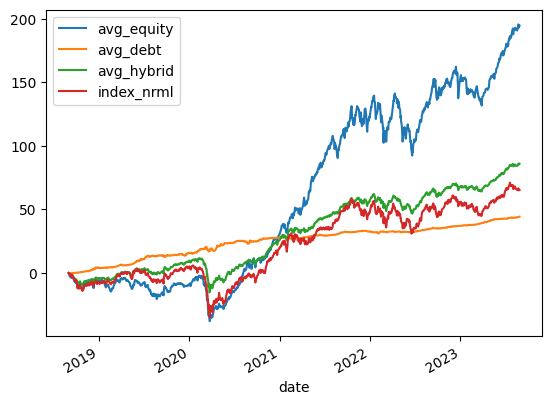

In [267]:
result_df.plot(x='date',y=['avg_equity','avg_debt','avg_hybrid','index_nrml'])
plt.legend()
plt.show()

In [269]:
result_df.to_csv(".//data_out//result.csv")
